# Linear Regression
## Linear Regression Quiz
### Problem statement
In this quiz, you'll be working with data on the average life expectancy at birth and the average the BMI for males across the world. The data comes from Gapminder.

The data file can be found under the "bmi_and_life_expectancy.csv" tab in the quiz below. The data includes the country the person was born in. This data is under the "Country" column. The Life expectancy for a person in that country in the "Life expectancy" column. The media BMI of a child born in that country as "BMI". You'll predict the life expectancy using this BMI.

('Laos: ', 60.315647163993056)


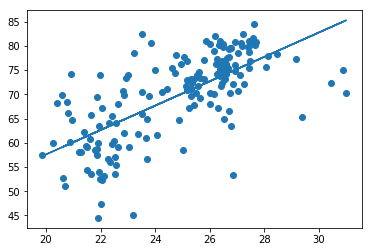

In [1]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')
# print(bmi_life_data)
x_values = bmi_life_data[['BMI']]
y_values = bmi_life_data[['Life expectancy']]

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(x_values, y_values)

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
print('Laos: ', laos_life_exp[0][0])

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, bmi_life_model.predict(x_values))
plt.show()


## Multiple Linear Regression
### Problem statement
In this quiz, you'll be using the Boston house-prices dataset. The dataset consists of 13 features of 506 houses and their median value in $1000's. You'll fit a model on the 13 features to predict on the value of houses.

You'll need to complete each of the following steps:

1. Build a linear regression model

Create a regression model using scikit-learn's LinearRegression and assign it to model.
Fit the model to the data.
2. Predict using the model

Predict the value of sample_house.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)
print(prediction)

[ 23.68420569]


## Live session: Siraj
### implement linear regression

In [13]:
from numpy import *
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1000 iterations b = 0.0889365199374, m = 1.47774408519, error = 112.614810116
